### Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

%matplotlib inline

### Simple Linear Regression
We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form
y=ax+b
where a is commonly known as the slope, and b is commonly known as the intercept.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

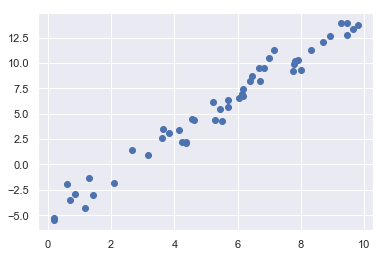

In [2]:
rn = np.random.RandomState(0)
x = 10 * rn.rand(50)
y = 2 * x - 5 + rn.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

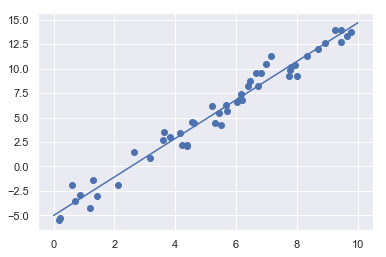

In [3]:
from sklearn.linear_model import LinearRegression

# LinearRegression estimator 
model = LinearRegression(fit_intercept=True)

# fit to the model
model.fit(x[:, np.newaxis], y)

# predict 
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.9692732947309532
Model intercept: -5.007210084130282


#### Let's do Linear Regression with some simple datasets

In [5]:
# You can download the dataset from Github Repository 

Salary_data = pd.read_csv('Salary_Data.csv')
Salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
Salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
# seperate the dataset into independent and dependent variable

X = Salary_data.iloc[ : , :-1].values
y = Salary_data.iloc[ : ,   1].values

In [8]:
#spilt the dataset into Training and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(9, 1)
(21,)
(9,)


In [10]:
# Fitting linear regression to the training set

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Predict the test set

y_pred = lm.predict(X_test)

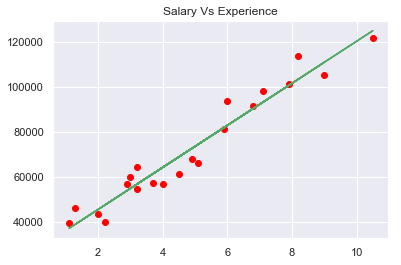

In [12]:
# Visualize the training and test set
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lm.predict(X_train),'g')
plt.title("Salary Vs Experience")
plt.show()

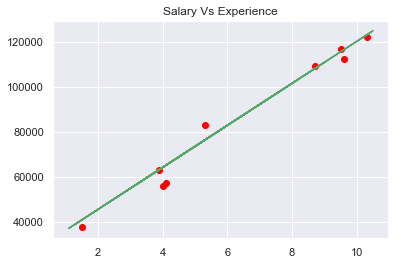

In [13]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,lm.predict(X_train),'g')
plt.title("Salary Vs Experience")
plt.show()